In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           8068        168  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           6293        133  1.0              
fahmidachowdhury/customer-segmentation-data-for-marketing-analysis  Customer Segmentation Data for Marketing Analysis   16KB  2024-06-28 15:58:29           1139         29  0.9411765        
clovisdalmolinvieira/us-housing-trends-values

In [2]:
! kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 94.4MB/s]


In [3]:
! unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [4]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
def normalize(df, col):
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [6]:
df = df.drop(columns = ['Row ID'])

In [7]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
# prompt: one hot encode the ship mode column

df = pd.get_dummies(df, columns=['Ship Mode'])
df


,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,True
4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,True
9796,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,True
9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,False,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,True


In [9]:
fields = ['Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Ship Mode_Same Day', 'Ship Mode_First Class']

for field in fields:
  df = df.rename(columns={field : field[10:]})

In [10]:
df

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,First Class,Same Day,Second Class,Standard Class
0,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,True
4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,True
9796,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,True
9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,False,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,True


In [11]:
#normalize(df, 'Sales')

In [12]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
# prompt: one hot encode segment

df = pd.get_dummies(df, columns=['Segment'])
df


,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,City,State,Postal Code,Region,...,Sub-Category,Product Name,Sales,First Class,Same Day,Second Class,Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420.0,South,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,True,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420.0,South,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,True,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,United States,Chicago,Illinois,60610.0,Central,...,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,True,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,...,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,True,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,...,Phones,GE 30524EE4,235.1880,False,False,False,True,False,True,False
9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,...,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,True,False,True,False


In [14]:
fields = ['Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']

for field in fields:
  df = df.rename(columns={field : field[8:]})

In [15]:
df['Customer ID'].str[:2].unique()

array(['CG', 'DV', 'SO', 'BH', 'AA', 'IM', 'HP', 'PK', 'AG', 'ZD', 'KB',
       'SF', 'EB', 'EH', 'TB', 'MA', 'GH', 'SN', 'LC', 'RA', 'ES', 'ON',
       'PO', 'LH', 'DP', 'JM', 'KM', 'PS', 'BS', 'KD', 'HM', 'JE', 'SC',
       'DN', 'JC', 'CS', 'PG', 'GM', 'JS', 'RB', 'PN', 'ER', 'GZ', 'PA',
       'CV', 'CL', 'RC', 'DK', 'GG', 'AD', 'PF', 'TS', 'LS', 'DW', 'JD',
       'SH', 'SG', 'HA', 'MG', 'TW', 'SP', 'NK', 'DB', 'NP', 'TT', 'EM',
       'RD', 'MJ', 'BM', 'JB', 'SJ', 'JK', 'RM', 'SK', 'FM', 'AM', 'MP',
       'MZ', 'CB', 'VM', 'FH', 'MB', 'HK', 'LE', 'JH', 'MS', 'VW', 'DS',
       'VD', 'EA', 'KL', 'KC', 'DL', 'DR', 'CC', 'Dl', 'SB', 'AH', 'CA',
       'KH', 'BB', 'JO', 'NZ', 'AS', 'CR', 'BP', 'NM', 'FA', 'GK', 'DJ',
       'JL', 'AC', 'TD', 'AB', 'VB', 'KW', 'MK', 'GT', 'MM', 'AR', 'LA',
       'DO', 'NG', 'MV', 'JG', 'VP', 'SS', 'LF', 'RF', 'CJ', 'PB', 'NF',
       'SD', 'TN', 'MH', 'JP', 'XP', 'MT', 'SA', 'CW', 'AJ', 'RO', 'MD',
       'MY', 'CM', 'BN', 'MC', 'BD', 'PH', 'RL', 'E

In [16]:
df = df.drop(columns = ['Customer ID'])

In [17]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Product ID,...,Sub-Category,Product Name,Sales,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,Home Office
0,CA-2017-152156,08/11/2017,11/11/2017,Claire Gute,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,True,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,Claire Gute,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,True,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Sally Hughsby,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,...,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,True,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,...,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,True,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,...,Phones,GE 30524EE4,235.1880,False,False,False,True,False,True,False
9798,CA-2016-128608,12/01/2016,17/01/2016,Cindy Schnelling,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,...,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,True,False,True,False


In [18]:
df = df.drop(columns = ['Customer Name'])

In [19]:
df

,Order ID,Order Date,Ship Date,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,Home Office
0,CA-2017-152156,08/11/2017,11/11/2017,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,True,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,True,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,True,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,True,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,False,False,False,True,False,True,False
9798,CA-2016-128608,12/01/2016,17/01/2016,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,True,False,True,False


In [20]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
# prompt: one hot encode category and rename with only furniture, office supllies etc

df = pd.get_dummies(df, columns=['Category'])

In [22]:
df['Country'].unique()

array(['United States'], dtype=object)

In [23]:
df = df.drop(columns = ['Country'])

In [24]:
df['City'].unique()
df = df.drop(columns = ['City'])

In [25]:
df['State'].unique()
df = df.drop(columns = ['State'])

In [26]:
df

,Order ID,Order Date,Ship Date,Postal Code,Region,Product ID,Sub-Category,Product Name,Sales,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,CA-2017-152156,08/11/2017,11/11/2017,42420.0,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,True,False,True,False,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,42420.0,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,False,True,False,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,90036.0,West,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,False,False,True,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,33311.0,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,True,True,False,False,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,33311.0,South,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,60610.0,Central,OFF-BI-10003429,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,True,False,True,False,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,43615.0,East,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,True,False,True,False,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,43615.0,East,TEC-PH-10004977,Phones,GE 30524EE4,235.1880,False,False,False,True,False,True,False,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,43615.0,East,TEC-PH-10000912,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,True,False,True,False,False,False,True


In [27]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [28]:
# prompt: one hot encode region

df = pd.get_dummies(df, columns=['Region'])
df

,Order ID,Order Date,Ship Date,Postal Code,Product ID,Sub-Category,Product Name,Sales,First Class,Same Day,...,Consumer,Corporate,Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
0,CA-2017-152156,08/11/2017,11/11/2017,42420.0,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,False,False,...,True,False,False,True,False,False,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,42420.0,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,...,True,False,False,True,False,False,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,90036.0,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,...,False,True,False,False,True,False,False,False,False,True
3,US-2016-108966,11/10/2016,18/10/2016,33311.0,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,...,True,False,False,True,False,False,False,False,True,False
4,US-2016-108966,11/10/2016,18/10/2016,33311.0,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,60610.0,OFF-BI-10003429,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,...,False,True,False,False,True,False,True,False,False,False
9796,CA-2016-128608,12/01/2016,17/01/2016,43615.0,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,...,False,True,False,False,True,False,False,True,False,False
9797,CA-2016-128608,12/01/2016,17/01/2016,43615.0,TEC-PH-10004977,Phones,GE 30524EE4,235.1880,False,False,...,False,True,False,False,False,True,False,True,False,False
9798,CA-2016-128608,12/01/2016,17/01/2016,43615.0,TEC-PH-10000912,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,...,False,True,False,False,False,True,False,True,False,False


In [29]:
normalize(df, 'Postal Code')

In [30]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [31]:
# prompt: one hot encode sub category

df = pd.get_dummies(df, columns=['Sub-Category'])

In [32]:
# prompt: create order date ship date and order year fields, extracting from order date and ship date

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [33]:
df

,Order ID,Order Date,Ship Date,Postal Code,Product ID,Product Name,Sales,First Class,Same Day,Second Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,CA-2017-152156,2017-11-08,2017-11-11,0.421123,FUR-BO-10001798,Bush Somerset Collection Bookcase,261.9600,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,CA-2017-152156,2017-11-08,2017-11-11,0.421123,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,CA-2017-138688,2017-06-12,2017-06-16,0.905710,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,US-2016-108966,2016-10-11,2016-10-18,0.328421,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,957.5775,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,US-2016-108966,2016-10-11,2016-10-18,0.328421,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,22.3680,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,0.606243,OFF-BI-10003429,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9796,CA-2016-128608,2016-01-12,2016-01-17,0.433285,OFF-AR-10001374,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9797,CA-2016-128608,2016-01-12,2016-01-17,0.433285,TEC-PH-10004977,GE 30524EE4,235.1880,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9798,CA-2016-128608,2016-01-12,2016-01-17,0.433285,TEC-PH-10000912,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [34]:
df = df.drop(columns=['Order ID', 'Product Name'])

In [35]:
df['Product ID'].str[4:6].unique()

array(['BO', 'CH', 'LA', 'TA', 'ST', 'FU', 'AR', 'PH', 'BI', 'AP', 'PA',
       'AC', 'EN', 'FA', 'SU', 'MA', 'CO'], dtype=object)

In [36]:
df = df.drop(columns = ['Product ID'])

In [37]:
df

,Order Date,Ship Date,Postal Code,Sales,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2017-11-08,2017-11-11,0.421123,261.9600,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2017-11-08,2017-11-11,0.421123,731.9400,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2017-06-12,2017-06-16,0.905710,14.6200,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,2016-10-11,2016-10-18,0.328421,957.5775,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
4,2016-10-11,2016-10-18,0.328421,22.3680,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,0.606243,3.7980,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9796,2016-01-12,2016-01-17,0.433285,10.3680,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9797,2016-01-12,2016-01-17,0.433285,235.1880,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
9798,2016-01-12,2016-01-17,0.433285,26.3760,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False


In [38]:
df = df.drop(columns = ['Postal Code'])

In [39]:
df

,Order Date,Ship Date,Sales,First Class,Same Day,Second Class,Standard Class,Consumer,Corporate,Home Office,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2017-11-08,2017-11-11,261.9600,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2017-11-08,2017-11-11,731.9400,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017-06-12,2017-06-16,14.6200,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,2016-10-11,2016-10-18,957.5775,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2016-10-11,2016-10-18,22.3680,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,3.7980,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9796,2016-01-12,2016-01-17,10.3680,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9797,2016-01-12,2016-01-17,235.1880,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
9798,2016-01-12,2016-01-17,26.3760,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [40]:
df['Ship Date'].unique()

<DatetimeArray>
['2017-11-11 00:00:00', '2017-06-16 00:00:00', '2016-10-18 00:00:00',
 '2015-06-14 00:00:00', '2018-04-20 00:00:00', '2017-12-10 00:00:00',
 '2016-11-26 00:00:00', '2015-11-18 00:00:00', '2015-05-15 00:00:00',
 '2015-09-01 00:00:00',
 ...
 '2018-08-31 00:00:00', '2016-10-25 00:00:00', '2015-03-03 00:00:00',
 '2018-01-07 00:00:00', '2018-01-29 00:00:00', '2017-06-23 00:00:00',
 '2016-01-31 00:00:00', '2015-03-12 00:00:00', '2018-04-06 00:00:00',
 '2016-05-13 00:00:00']
Length: 1326, dtype: datetime64[ns]

In [41]:
# prompt: check if there are more than one entry for the same ship date

df_grouped = df.groupby('Ship Date')['Sales'].count()
multi_entries = df_grouped[df_grouped > 1]

if len(multi_entries) > 0:
  print("There are multiple entries for the same ship date.")
else:
  print("There are no multiple entries for the same ship date.")


There are multiple entries for the same ship date.


#MA Implementation

In [43]:
# prompt: create a new dataframe 'plot_df' with fields 'ship date' and 'sales' as the ship date and the sum of all the different sales corresponding to that date respectively

plot_df = df.groupby('Ship Date')['Sales'].sum().reset_index()
plot_df


,Ship Date,Sales
0,2015-01-07,29.2280
1,2015-01-08,307.5000
2,2015-01-10,4374.8800
3,2015-01-12,106.6940
4,2015-01-13,40.5440
...,...,...
1321,2019-01-01,2390.1548
1322,2019-01-02,1545.6240
1323,2019-01-03,569.2740
1324,2019-01-04,344.2240


In [44]:
# prompt: fill in the remaining dates with zero value to complete date gaps

# Find the minimum and maximum dates in the dataset
min_date = plot_df['Ship Date'].min()
max_date = plot_df['Ship Date'].max()

# Create a sequence of all dates between the minimum and maximum dates
date_range = pd.date_range(start=min_date, end=max_date)

# Merge the date range with the original DataFrame
merged_df = pd.merge(pd.DataFrame({'Ship Date': date_range}), plot_df, on='Ship Date', how='left')

# Fill missing values with 0
merged_df['Sales'].fillna(0, inplace=True)

# Print the merged DataFrame
print(merged_df)


      Ship Date      Sales
0    2015-01-07    29.2280
1    2015-01-08   307.5000
2    2015-01-09     0.0000
3    2015-01-10  4374.8800
4    2015-01-11     0.0000
...         ...        ...
1455 2019-01-01  2390.1548
1456 2019-01-02  1545.6240
1457 2019-01-03   569.2740
1458 2019-01-04   344.2240
1459 2019-01-05   310.4200

[1460 rows x 2 columns]


In [51]:
# prompt: find the data type of sales entries

df['Sales'].dtype
plot_df = merged_df

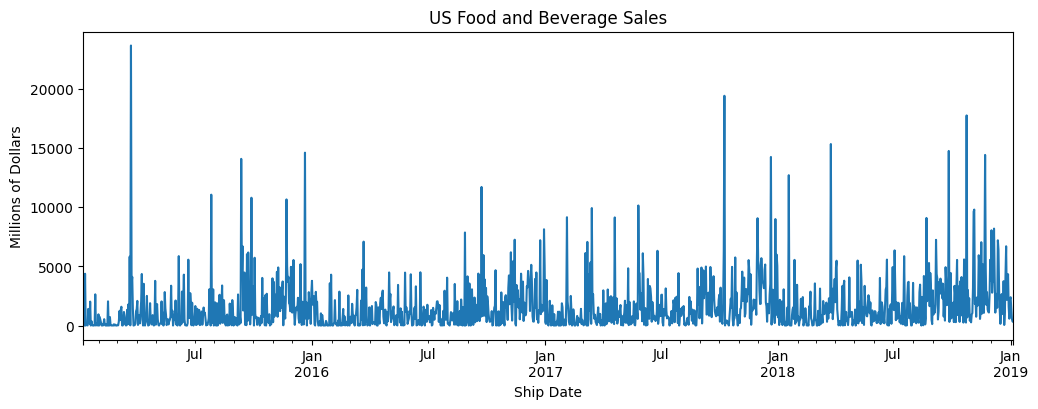

In [94]:
import matplotlib.pyplot as plt
plot_params = {
    # 'color': '0.75',
    'style': '-',
    'markeredgecolor': '0.25',
    'markerfacecolor': '0.25',
    'legend': False}

ax = plot_df.plot(**plot_params, figsize=(12, 4))
ax.set(title="US Food and Beverage Sales", ylabel="Millions of Dollars");

In [57]:
plot_df
# indexing -> plot_df = plot_df.set_index("Ship Date").to_period()

,Sales
Ship Date,
2015-01-07,29.2280
2015-01-08,307.5000
2015-01-09,0.0000
2015-01-10,4374.8800
2015-01-11,0.0000
...,...
2019-01-01,2390.1548
2019-01-02,1545.6240
2019-01-03,569.2740


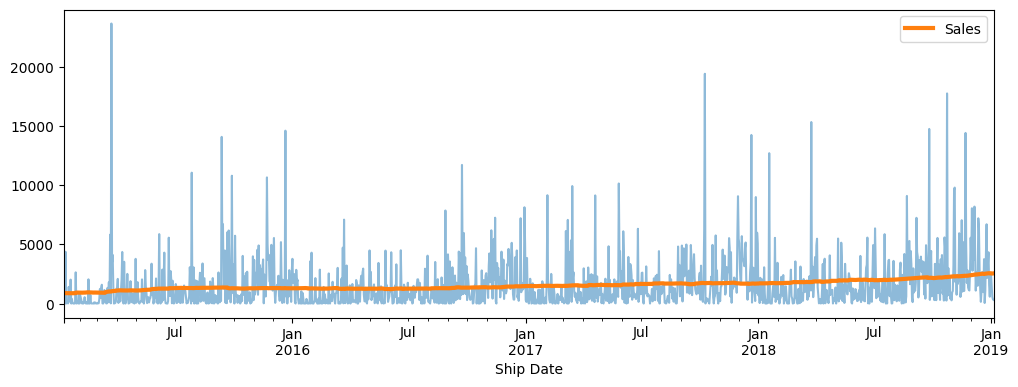

In [120]:
plot_params = {
# 'color': '0.75',
  'style': '-',
  'markeredgecolor': '0.25',
  'markerfacecolor': '0.25',
  'legend': False}

moving_average = plot_df.rolling(window=365, center=True, min_periods=183).mean()

ax = plot_df.plot(**plot_params, alpha=0.5, figsize=(12, 4))
ax = moving_average.plot(ax=ax, linewidth=3, figsize=(12, 4))

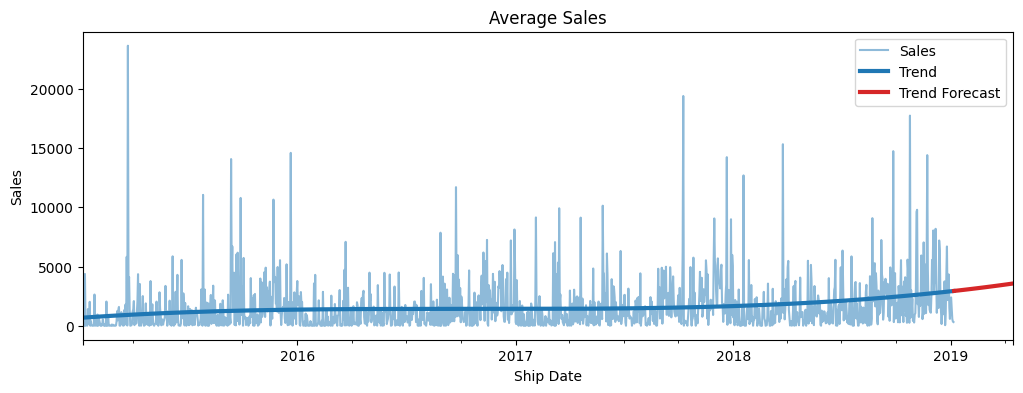

In [119]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.deterministic import DeterministicProcess

y = plot_df.copy()  # the target

dp = DeterministicProcess(
    index=y.index,
    constant=False,
    order=3,
    drop=True)

X = dp.in_sample()
X_fore = dp.out_of_sample(steps=100)

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X).flatten(), index=X.index)
y_fore = pd.Series(model.predict(X_fore).flatten(), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="Sales", figsize=(12, 4))
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0', figsize=(12, 4))
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3', figsize=(12,4))
ax.legend()